## Features extraction

In [56]:
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from umap import UMAP
import plotly.express as px
import subprocess
import os

In [4]:
LABELS = [
    "get, take",
    "place, place-on, place-back, put, put-back",
    "open",
    "close",
    "clean, wipe-off, wipe, wash, rinse",
    "cut, chop, slice",
    "mix, mix-around, stir, whisk",
    "pour"
]

In [69]:
if False:   

    # Assicurati di essere nella directory corretta
    os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=true',
        'save.num_frames_per_clip.RGB=5',
        'name=saved_feat_I3D_5_Dense'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

In [8]:
# Assicurati di essere nella directory corretta
path1 = "/Users/andreavannozzi/GithubProjects/Egocentric-Vision"
path2 = "C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision"
os.chdir(path1)
num_frames_list = [5,10,25]
#DENSE
if True:
    for n in num_frames_list:
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=./ek_data/frames',
            'save.dense_sampling.RGB=true',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_dense'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

    #UNIFORM
    for n in num_frames_list:
        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=./ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

Output: Using device: cpu

Output: Using device: cpu

Output: Using device: cpu

UNIFORM n = 5
Output: Using device: cpu

Error: /Users/andreavannozzi/GithubProjects/Egocentric-Vision/env/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/andreavannozzi/GithubProjects/Egocentric-Vision/env/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <0EB69795-4559-3C98-9EA1-35B6A988BB99> /Users/andreavannozzi/GithubProjects/Egocentric-Vision/env/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <E4E2FFCA-031E-3974-A7B0-45408D7F4956> /Users/andreavannozzi/GithubProjects/Egocentric-Vision/env/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
2024-05-29 16:03:16 LOG INFO Feature Extraction
2024-05-29 16:03:16 LOG INFO Running with parameters: 
  action: save
  name: saved_fea

## Read extracted feature

In [39]:
features = pd.read_pickle("./saved_features/saved_feat_I3D_25_dense_D1_test.pkl")
#print(features['features'][0])
print(len(features['features']))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
print(features['features'][0].keys())
list_of_features = [np.mean(np.array(feature['features_RGB']),axis=0) for feature in features["features"]]
clips_feature = list_of_features
labels = [feature['label'] for feature in features["features"]]
print(max(labels))

435
dict_keys(['uid', 'video_name', 'features_RGB', 'label'])
7


# K-Means

In [53]:
clips_feature_tensor = np.array(clips_feature)

print(clips_feature_tensor.shape)

kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']
kmeans_color_map = {i: color for i, color in enumerate(cmap)}

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=3, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['kmeans'] = y_kmeans.astype(str)
df['labels'] = np.array(labels).astype(str)

(435, 1024)


## plot using TSNE 2D

In [55]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=2, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
print()
# scatter plot of X values
fig = px.scatter_matrix(df, dimensions=["x", "y", "z"], color=labels)

fig.show()


## plot using TSNE 3D

In [52]:

#plot k_means
fig = px.scatter_3d(df, x='x', y='y', z='z', color="kmeans", color_discrete_map=kmeans_color_map)
fig.update_traces(marker_size=3)
fig.show()

#plot real label
fig = px.scatter_3d(df, x='x', y='y', z='z', color="labels", color_discrete_map=kmeans_color_map)
fig.update_traces(marker_size=3)
fig.show()

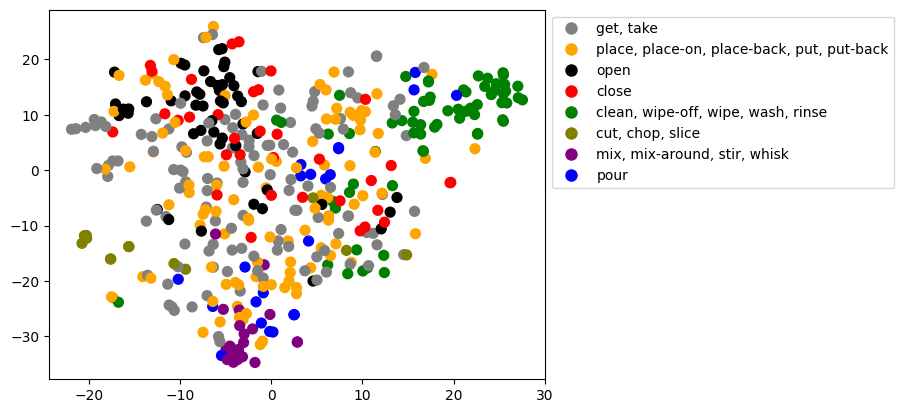

In [16]:
cmap = ListedColormap(['gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]

# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Plot using UMAP

In [59]:
features = df.loc[:, :'z']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

print(df.keys())
proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.labels, labels=labels
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.labels, labels=labels
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

Index(['x', 'y', 'z', 'kmeans', 'labels'], dtype='object')


/Users/andreavannozzi/GithubProjects/Multimodal-Egocentric-Action-Recognition/env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


KeyError: ('x', 'y', 'z')

## PROVA

In [10]:
if False:
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=false',
        f'save.num_frames_per_clip.RGB=16',
        f'name=PROVA'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

Output: Using device: cpu

Command failed with return code 1
